# 0. Chargement du dataset

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import sort_dataframeby_monthorweek as sd

#library used for visualizing missing data in datasets
import missingno as msno 

# Function for splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.utils import to_categorical
import keras
from keras.layers import Dense
from keras.models import Sequential

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 35)
df= pd.read_csv('hotel_bookings.csv', sep=',')

# 1. Exploration et préparation des données


In [2]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [85]:
# Afficher les informations sur le DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [86]:
#Nombre de lignes
print("Nombre de lignes :", df.shape[0], "\n")

#Nombre de colonnes
print("Nombre de colonnes :", df.shape[1], "\n")

Nombre de lignes : 119390 

Nombre de colonnes : 32 



In [73]:
# Affichage des colonnes
print(df.columns, "\n")

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object') 



# 2. Nettoyage des Données

## 2.1. Identification et suppresion des doublons

In [43]:
# Lignes en double
doublons = df.duplicated().sum()
print("\nNombre de lignes en double (à l'exclusion de l'ID):", doublons)

# 31994


Nombre de lignes en double (à l'exclusion de l'ID): 31994


In [44]:
# Supprimer les ligne en double
df = df.drop_duplicates()

## 2.2. Gestion des Valeurs Nulles

### 2.2.1. Identifier les valeurs nulles et leur pourcentage


In [45]:
val_null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
val_null

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.004577
babies                                    0                0.000000
meal                                      0                0.000000
country                                 452                0.517186
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 12193               13.951439
company                               82137               93.982562
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

### 2.2.2. Remplacer les valeurs numériques nulles par la médiane

In [46]:
# Sélectionner les colonnes numériques
df_num = df.select_dtypes(include=[np.number])

# Remplacer les valeurs nulles par la médiane pour les colonnes numériques
df_num.fillna(df_num.median(), inplace=True)

df.update(df_num)

In [47]:
# Remplacer les valeurs nulles par "NULL" pour une colonne spécifique
df['country'].fillna("NULL", inplace=True)

# Remplacer les valeurs nulles par les valeurs les plus fréquentes
df['country'] = df['country'].fillna(df['country'].mode()[0])

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_13136\608511514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna("NULL", inplace=True)


## 2.3. Suppression de Colonnes et Lignes Inutiles

In [27]:
# Colonnes presque vides
colonnes_presque_vides = [colonne for colonne in df.columns if df[colonne].isnull().sum() >= 0.9 * len(df)]
print("Colonnes (presque) vides et pouvant être supprimées:",colonnes_presque_vides)

Colonnes (presque) vides et pouvant être supprimées: []


In [48]:
# Filtrer les lignes où adults, babies et children sont tous à zéro 
filter = (df['adults'] == 0) & (df['babies'] == 0) & (df['children'] == 0)

# Supprimer les lignes invalides
df = df[~filter]

df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

## 2.4. Transformation et Suppression des Colonnes de Date

In [9]:
# Convertir les colonnes en une chaîne de caractères représentant une date
df['date_arrive'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str)

# Maintenant, convertir cette chaîne en datetime
df['date_arrive'] = pd.to_datetime(df['date_arrive'])

# # Supprimer les anciennes colonnes
# df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

# Calculer la date de départ
df['departure_date'] = df['date_arrive'] + pd.to_timedelta(df['stays_in_week_nights'] + df['stays_in_weekend_nights'], unit='D')

## 2.5. Supprimer les lignes qui ont la date_arrive et le meme que departure_date

In [10]:
df = df.drop(df[df['date_arrive'] == df['departure_date']].index)
df

hotel  is_canceled  lead_time  arrival_date_year  \
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
7       Resort Hotel            0          9               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
2                    July                        27   
3                    July                        27   
4                    July                        27   
6                    July                        27   
7                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
6                               1                        0   
7                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
6                          2       2       0.0       0   BB     PRT   
7                          2       2       0.0       0   FB     PRT   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
6              Direct               Direct                  0   
7              Direct               Direct                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2                            0                               0   
3                            0        

## 2.6. visualisation des valeurs nulles aprés le nettoyage

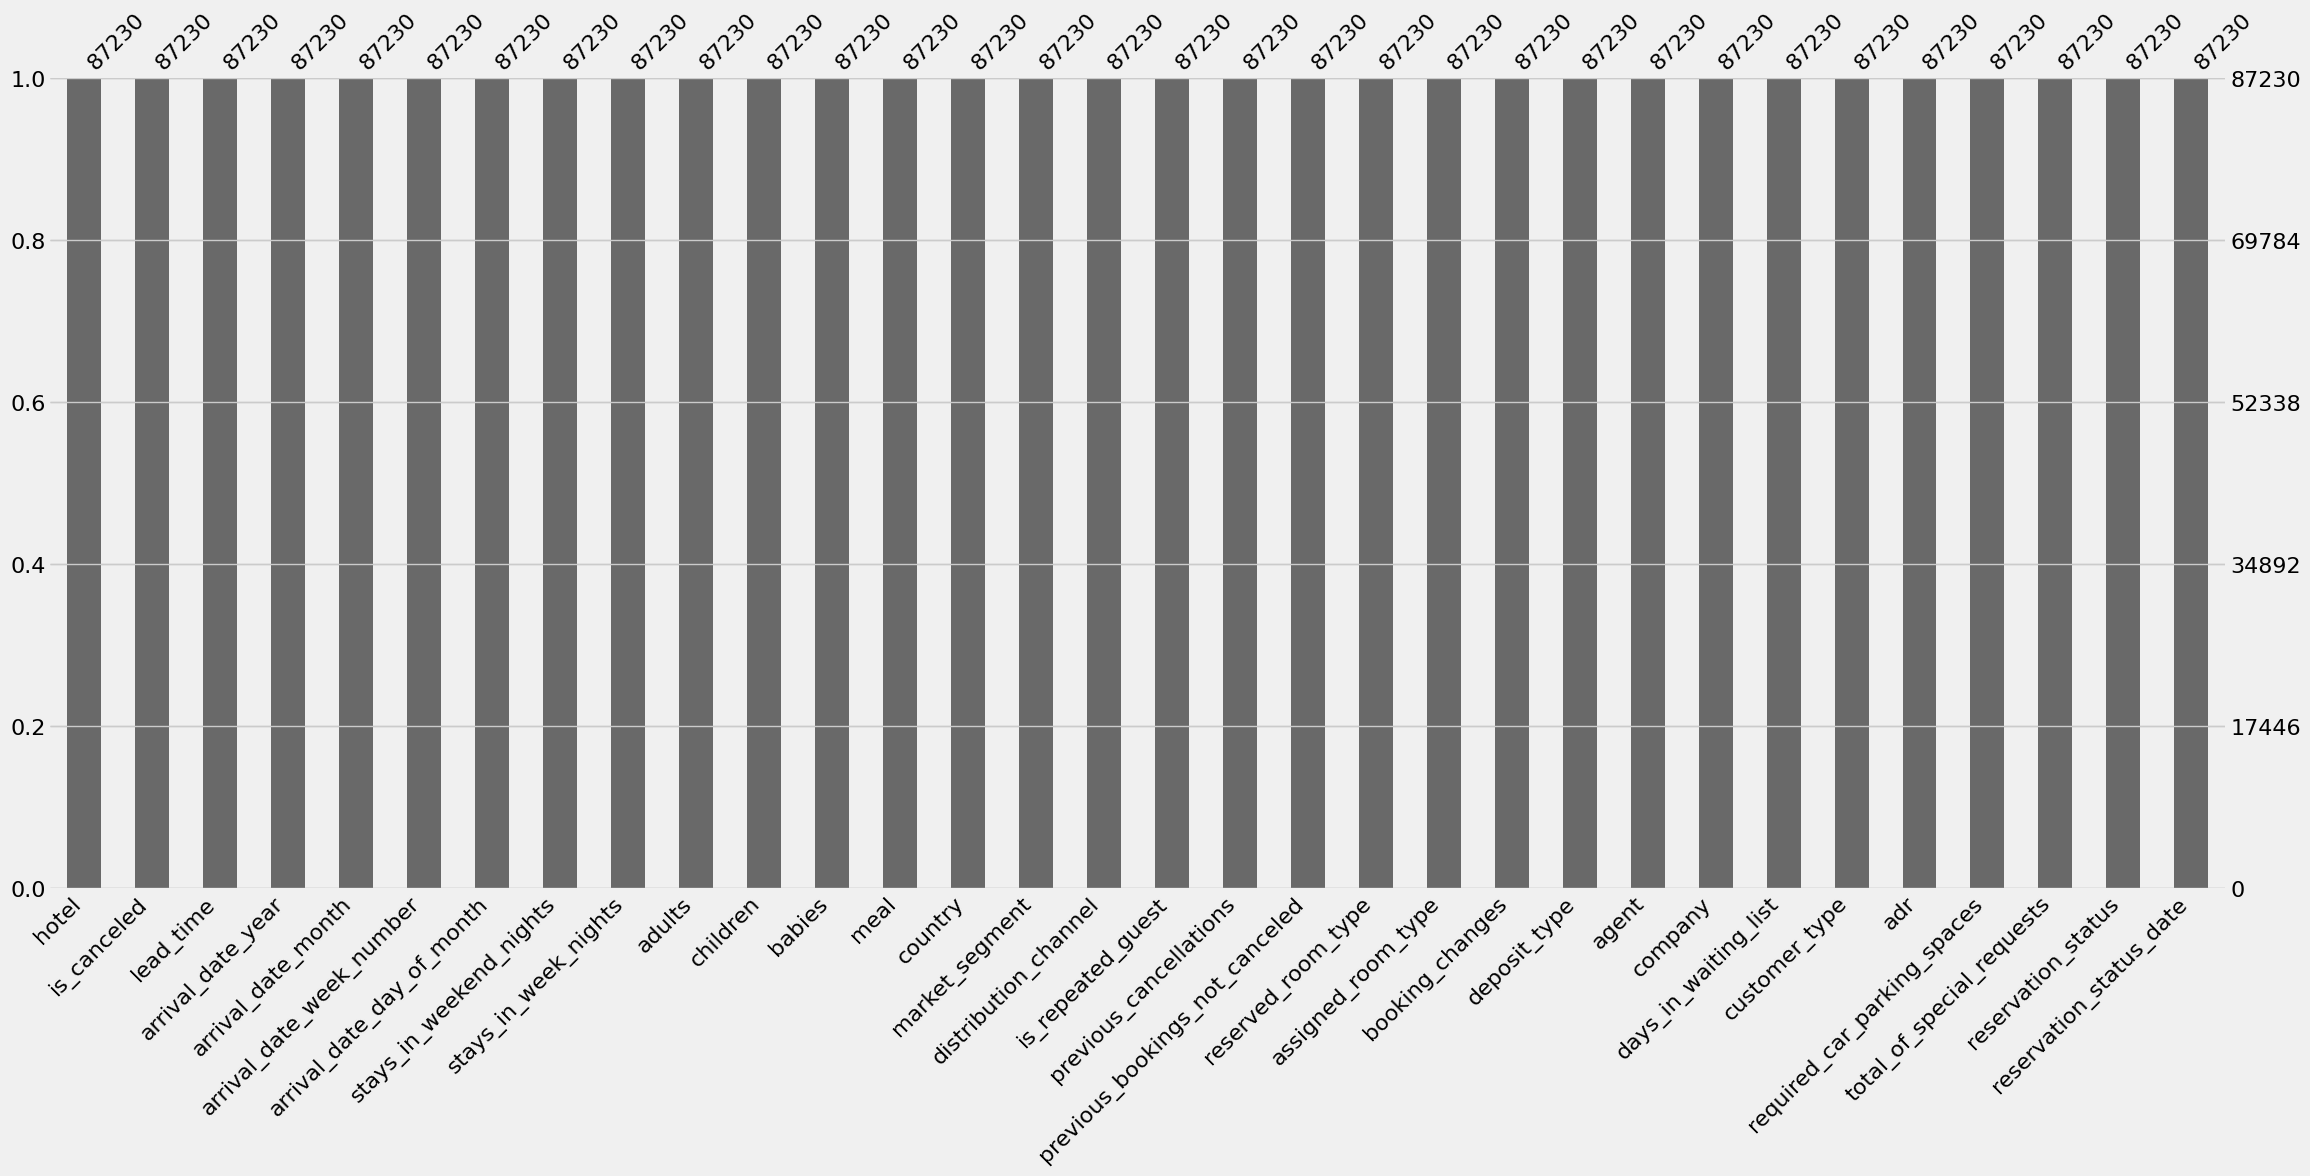

In [49]:
msno.bar(df)
plt.show()

# 3. Statistique descriptive

## 3.1. Nombre d'invités par pays

In [12]:
# Calcul des invités par pays
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

country  No of guests
0       PRT         17094
1       GBR          8418
2       FRA          7082
3       ESP          5367
4       DEU          4332
..      ...           ...
160     MAC             1
161     BFA             1
162     DJI             1
163     MMR             1
164     FRO             1

[165 rows x 2 columns]

In [13]:
# Création de la carte
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations=country_wise_guests['country'],color=country_wise_guests['No of guests'], hover_name=country_wise_guests['country'])
guests_map.show()

## 3.2. Nombre d'invités par region

### 3.2.1 Créer le colonne region

In [20]:
countries_regions = {
    'AFG': 'Asia',
    'AGO': 'Africa',
    'ALB': 'Europe',
    'AND': 'Europe',
    'ARE': 'Asia',
    'ARG': 'South America',
    'ARM': 'Asia',
    'ATG': 'North America',
    'AUS': 'Oceania',
    'AUT': 'Europe',
    'AZE': 'Asia',
    'BDI': 'Africa',
    'BEL': 'Europe',
    'BEN': 'Africa',
    'BFA': 'Africa',
    'BGD': 'Asia',
    'BGR': 'Europe',
    'BHR': 'Asia',
    'BHS': 'North America',
    'BIH': 'Europe',
    'BLR': 'Europe',
    'BLZ': 'North America',
    'BOL': 'South America',
    'BRA': 'South America',
    'BRB': 'North America',
    'BRN': 'Asia',
    'BTN': 'Asia',
    'BWA': 'Africa',
    'CAF': 'Africa',
    'CAN': 'North America',
    'CHE': 'Europe',
    'CHL': 'South America',
    'CHN': 'Asia',
    'CIV': 'Africa',
    'CMR': 'Africa',
    'COD': 'Africa',
    'COG': 'Africa',
    'COL': 'South America',
    'COM': 'Africa',
    'CPV': 'Africa',
    'CRI': 'North America',
    'CUB': 'North America',
    'CYP': 'Asia',
    'CZE': 'Europe',
    'DEU': 'Europe',
    'DJI': 'Africa',
    'DNK': 'Europe',
    'DO': 'North America',
    'DOM': 'North America',
    'DZA': 'Africa',
    'ECU': 'South America',
    'EGY': 'Africa',
    'ERI': 'Africa',
    'ESP': 'Europe',
    'EST': 'Europe',
    'ETH': 'Africa',
    'EUZ': 'Europe',
    'FIN': 'Europe',
    'FJI': 'Oceania',
    'FRA': 'Europe',
    'FSM': 'Oceania',
    'FYR': 'Europe',
    'GAB': 'Africa',
    'GBR': 'Europe',
    'GEO': 'Asia',
    'GHA': 'Africa',
    'GIN': 'Africa',
    'GMB': 'Africa',
    'GNB': 'Africa',
    'GNQ': 'Africa',
    'GRC': 'Europe',
    'GRD': 'North America',
    'GTM': 'North America',
    'GUY': 'South America',
    'HND': 'North America',
    'HRV': 'Europe',
    'HTI': 'North America',
    'HUN': 'Europe',
    'IDN': 'Asia',
    'IND': 'Asia',
    'IRL': 'Europe',
    'IRN': 'Asia',
    'IRQ': 'Asia',
    'ISL': 'Europe',
    'ISR': 'Asia',
    'ITA': 'Europe',
    'JAM': 'North America',
    'JOR': 'Asia',
    'JPN': 'Asia',
    'KAZ': 'Asia',
    'KEN': 'Africa',
    'KGZ': 'Asia',
    'KHM': 'Asia',
    'KIR': 'Oceania',
    'KNA': 'North America',
    'KOR': 'Asia',
    'KWT': 'Asia',
    'LAO': 'Asia',
    'LBN': 'Asia',
    'LBR': 'Africa',
    'LBY': 'Africa',
    'LCA': 'North America',
    'LIE': 'Europe',
    'LKA': 'Asia',
    'LSO': 'Africa',
    'LTU': 'Europe',
    'LUX': 'Europe',
    'LVA': 'Europe',
    'MAR': 'Africa',
    'MCO': 'Europe',
    'MDA': 'Europe',
    'MDG': 'Africa',
    'MDV': 'Asia',
    'MEX': 'North America',
    'MHL': 'Oceania',
    'MLI': 'Africa',
    'MLT': 'Europe',
    'MMR': 'Asia',
    'MNG': 'Asia',
    'MNP': 'Oceania',
    'MOZ': 'Africa',
    'MRT': 'Africa',
    'MUS': 'Africa',
    'MWI': 'Africa',
    'MYS': 'Asia',
    'NAM': 'Africa',
    'NER': 'Africa',
    'NGA': 'Africa',
    'NIC': 'North America',
    'NLD': 'Europe',
    'NOR': 'Europe',
    'NPL': 'Asia',
    'NRU': 'Oceania',
    'NZL': 'Oceania',
    'OMN': 'Asia',
    'PAK': 'Asia',
    'PAN': 'North America',
    'PER': 'South America',
    'PHL': 'Asia',
    'PLW': 'Oceania',
    'PNG': 'Oceania',
    'POL': 'Europe',
    'PRI': 'North America',
    'PRK': 'Asia',
    'PRT': 'Europe',
    'PRY': 'South America',
    'QAT': 'Asia',
    'ROU': 'Europe',
    'RUS': 'Europe',
    'RWA': 'Africa',
    'SAU': 'Asia',
    'SCG': 'Europe',
    'SDN': 'Africa',
    'SEN': 'Africa',
    'SGP': 'Asia',
    'SLB': 'Oceania',
    'SLE': 'Africa',
    'SLV': 'North America',
    'SMR': 'Europe',
    'SOM': 'Africa',
    'STP': 'Africa',
    'SUR': 'South America',
    'SVK': 'Europe',
    'SVN': 'Europe',
    'SWE': 'Europe',
    'SWZ': 'Africa',
    'SYC': 'Africa',
    'SYR': 'Asia',
    'TCD': 'Africa',
    'TGO': 'Africa',
    'THA': 'Asia',
    'TJK': 'Asia',
    'TKM': 'Asia',
    'TLS': 'Oceania',
    'TON': 'Oceania',
    'TTO': 'North America',
    'TUN': 'Africa',
    'TUR': 'Europe',
    'TUV': 'Oceania',
    'TWN': 'Asia',
    'TZN': 'Africa',
    'UGA': 'Africa',
    'UKR': 'Europe',
    'URY': 'South America',
    'USA': 'North America',
    'UZB': 'Asia',
    'VAT': 'Europe',
    'VCT': 'North America',
    'VEN': 'South America',
    'VNM': 'Asia',
    'VUT': 'Oceania',
    'WSM': 'Oceania',
    'YEM': 'Asia',
    'ZAF': 'Africa',
    'ZMB': 'Africa',
    'ZWE': 'Africa'
}

df['region'] = df['country'].map(countries_regions)

df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

   month_of_reservation  total_nights  region  
0                     7             0  Europe  
1                     7             0  Europe  
2                     7             1  Europe  
3                     7             1  Europe  
4                     7             2  Europe

### 6.2.2 Visualisation des invités par région


In [21]:
region_wise_guests = df[df['is_canceled'] == 0]['region'].value_counts().reset_index()
region_wise_guests.columns = ['region', 'No of guests']

region_wise_guests

region  No of guests
0         Europe         67234
1           Asia          1828
2  South America          1750
3  North America          1741
4         Africa           632
5        Oceania           389

## 3.3. Frequence des Annulations de Réservations


Statistiques descriptives pour la colonne 'is_canceled': 

count    86639.000000
mean         0.276850
std          0.447444
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64 

is_canceled
0    62653
1    23986
Name: count, dtype: int64


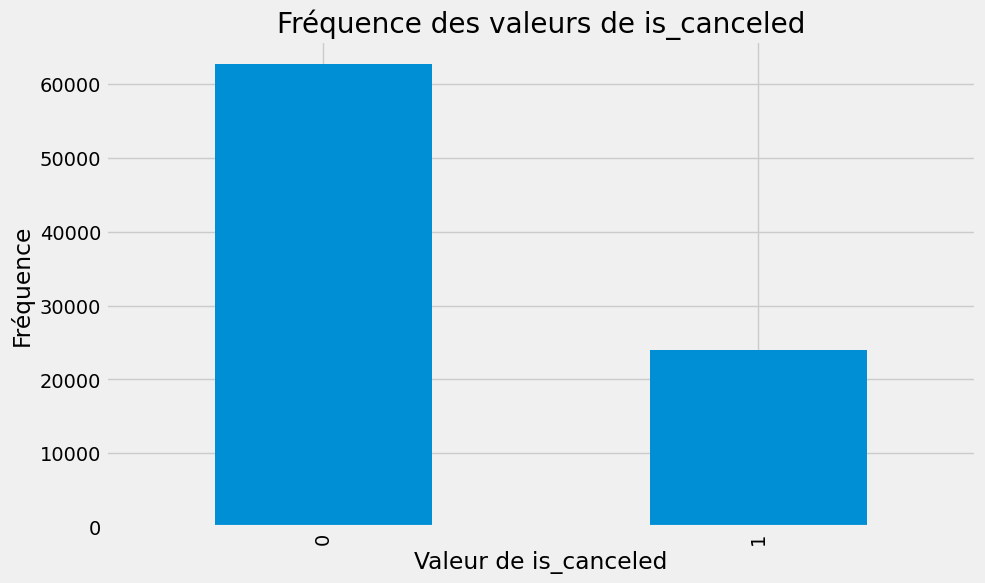

In [16]:
print("\nStatistiques descriptives pour la colonne 'is_canceled': \n")
print(df['is_canceled'].describe(), "\n")

canceled_frequency = df['is_canceled'].value_counts()

print(canceled_frequency)

plt.figure(figsize=(10, 6))
canceled_frequency.plot(kind='bar')

plt.xlabel('Valeur de is_canceled')
plt.ylabel('Fréquence')
plt.title('Fréquence des valeurs de is_canceled')

plt.show()


## 3.4. Nombre des reservations annulées

In [17]:
# Calculer le nombre total d'invités et le nombre d'invités annulés
total_guests = df.shape[0]
canceled_guests = df[df['is_canceled'] == 1].shape[0]

# Créer un diagramme à secteurs
fig = px.pie(values=[total_guests - canceled_guests, canceled_guests],
             names=['Invités non annulés', 'Invités annulés'],
             title='Proportion d\'invités annulés',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## 3.5. Analyse des Réservations Annulées et Non Annulées Par Saison

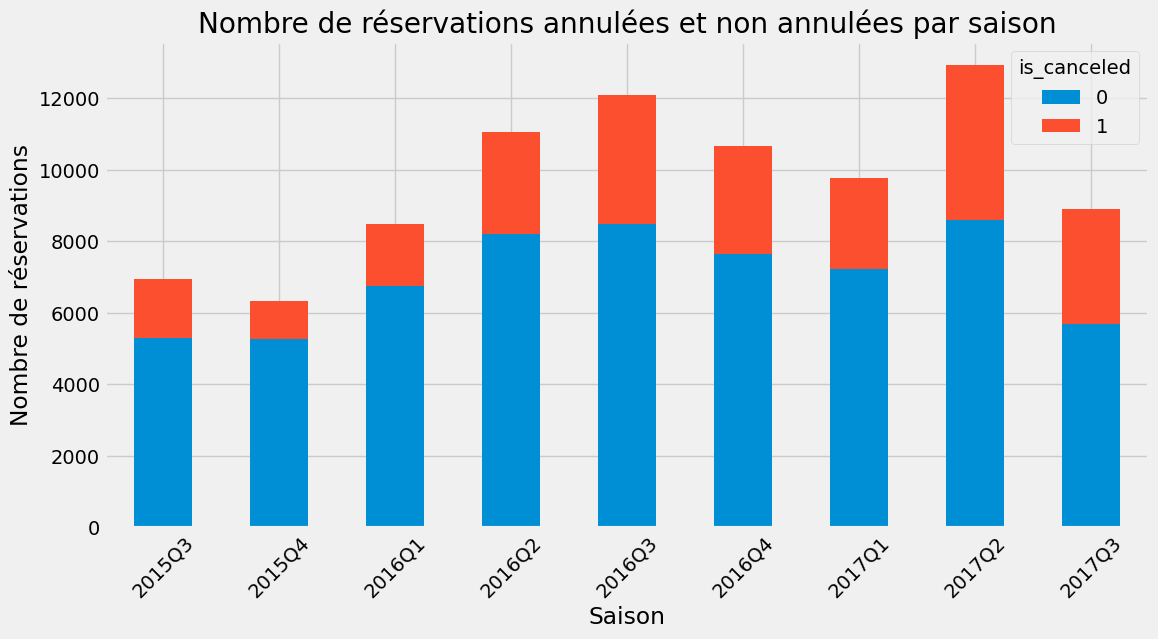

In [9]:
# Convertir la colonne de date en datetime si nécessaire
df['date_arrive'] = pd.to_datetime(df['date_arrive'])

# Extraire la saison de la colonne 'date_arrive'
df['season'] = df['date_arrive'].dt.to_period('Q')

# Grouper par 'season' et 'is_canceled', puis compter le nombre de réservations
grouped_data = df.groupby(['season', 'is_canceled']).size().unstack(fill_value=0)

# Créer un diagramme pour visualiser le nombre de réservations annulées et non annulées par saison
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Nombre de réservations annulées et non annulées par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de réservations')
plt.xticks(rotation=45)  # Pour améliorer la lisibilité des labels des saisons
plt.show()

## 3.6. Analyse des Réservations par Type de Client et par saison

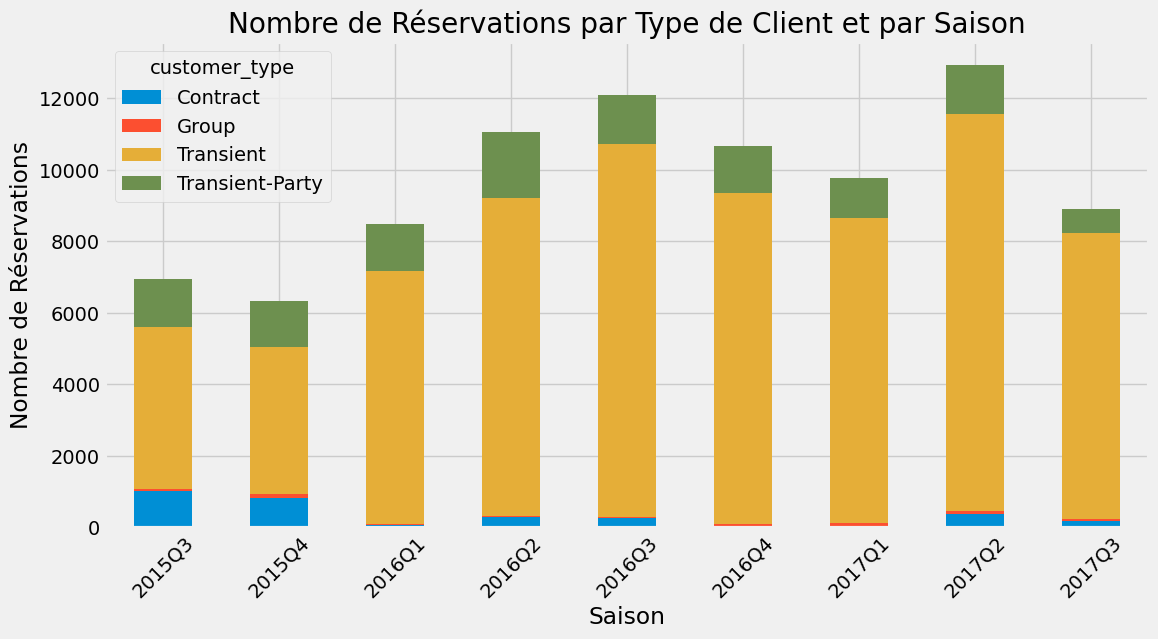

In [10]:
df['date_arrive'] = pd.to_datetime(df['date_arrive'])

# Extraire la saison de la colonne 'date_arrive'
df['season'] = df['date_arrive'].dt.to_period('Q')

# Grouper par 'season' et 'customer_type', puis compter le nombre de réservations
grouped_data = df.groupby(['season', 'customer_type']).size().unstack(fill_value=0)

# Créer un diagramme pour visualiser le nombre de réservations par type de client et par saison
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Nombre de Réservations par Type de Client et par Saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de Réservations')
plt.xticks(rotation=45)  # Pour améliorer la lisibilité des labels des saisons
plt.show()

## 3.7. Analyse des Réservations par Type de Client

customer_type
Contract            3119
Group                536
Transient          71366
Transient-Party    11618
dtype: int64 



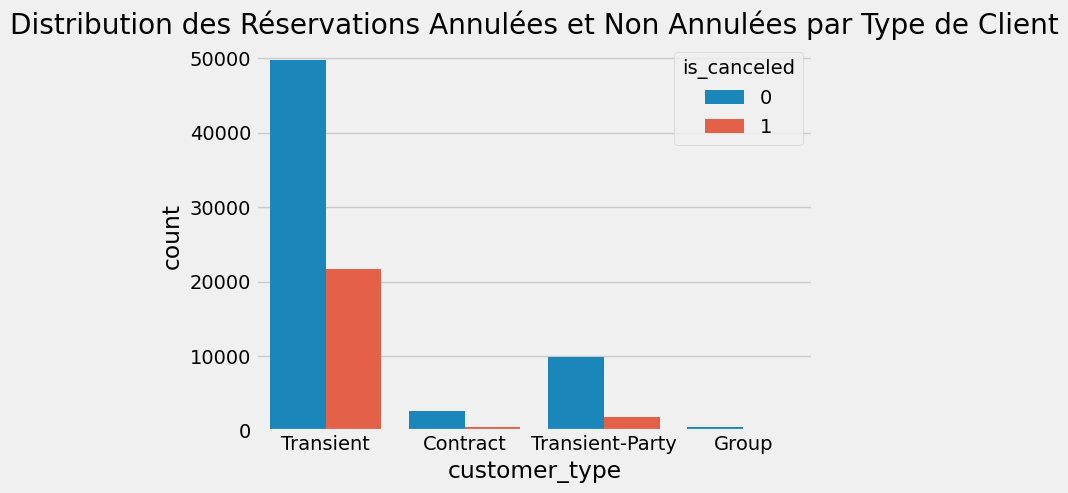

In [20]:
# Calculer le nombre total de réservations pour chaque type de client
reservations_by_customer_type = df.groupby('customer_type').size()

# Afficher les résultats
print(reservations_by_customer_type, "\n")

# Créer un diagramme à barres empilées pour les réservations annulées et non annulées par type de client
sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.title('Distribution des Réservations Annulées et Non Annulées par Type de Client')
plt.show()

## 3.8. Fréquence des mois de réservation

<Figure size 1000x600 with 0 Axes>

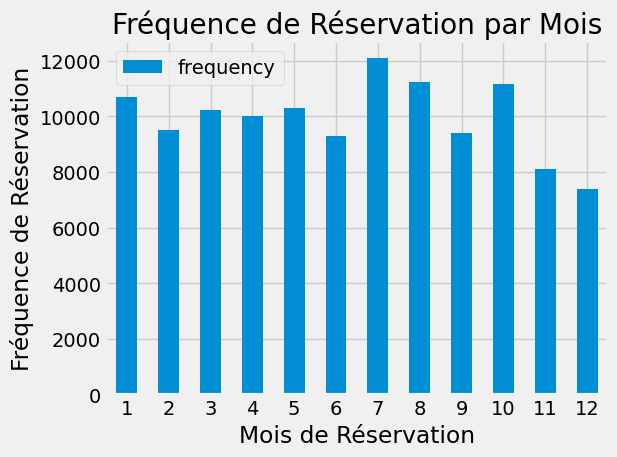

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous que df est votre DataFrame existant avec une colonne 'reservation_status_date'

# Convertir la colonne 'reservation_status_date' en datetime si elle ne l'est pas déjà
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extraire le mois de la colonne 'reservation_status_date'
df['month_of_reservation'] = df['reservation_status_date'].dt.month

# Grouper par mois et compter le nombre de réservations pour chaque mois
monthly_reservations = df.groupby('month_of_reservation').size().reset_index(name='frequency')

# Tracé du graphique à barres
plt.figure(figsize=(10, 6))
monthly_reservations.plot(x='month_of_reservation', y='frequency', kind='bar')

plt.xlabel('Mois de Réservation')
plt.ylabel('Fréquence de Réservation')
plt.title('Fréquence de Réservation par Mois')

plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()


## 3.9. Fréquence des Hotels de réservation

hotel
City Hotel      53043
Resort Hotel    33596
Name: count, dtype: int64


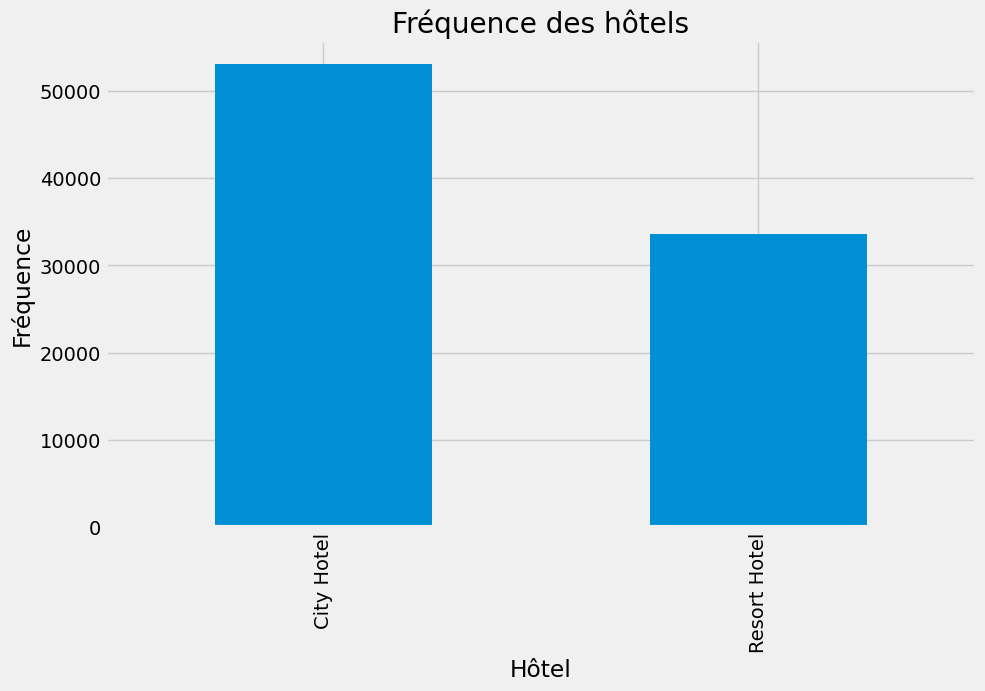

In [23]:
hotel_frequency = df['hotel'].value_counts()
print(hotel_frequency)

plt.figure(figsize=(10, 6))
hotel_frequency.plot(kind='bar')

plt.xlabel('Hôtel')
plt.ylabel('Fréquence')
plt.title('Fréquence des hôtels')

plt.show()

## 3.10. Analyse Comparative de l'ADR Moyen par Hôtel

hotel
City Hotel      111.756553
Resort Hotel    100.120995
Name: adr, dtype: float64 



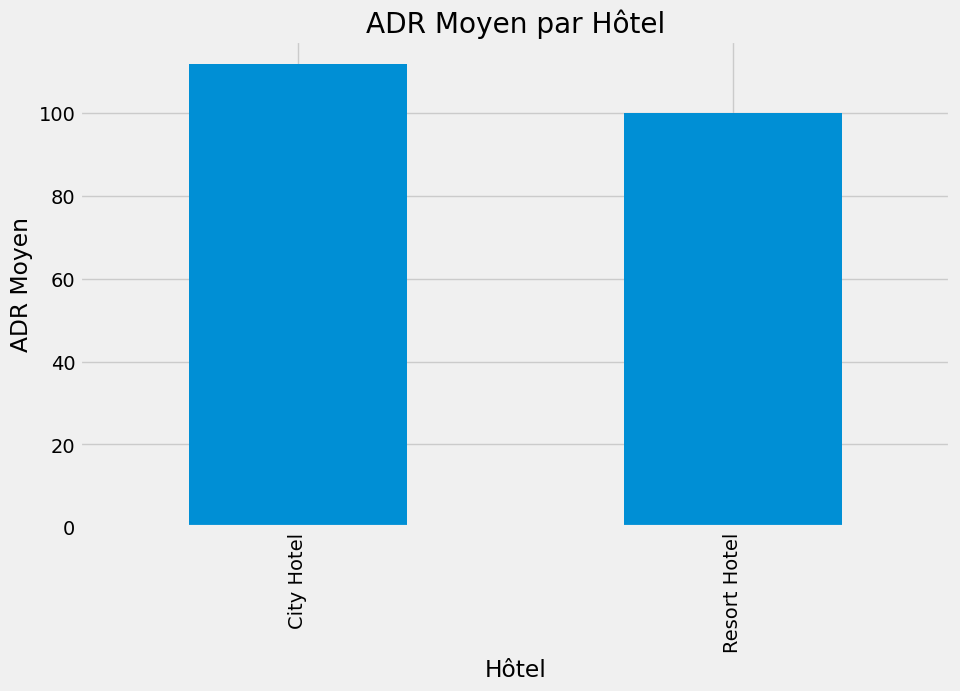

In [ ]:
# Calculer l'ADR "Average Daily Rate" moyen pour chaque hôtel
adr_mean_by_hotel = df.groupby('hotel')['adr'].mean()

# Afficher les résultats
print(adr_mean_by_hotel, "\n")

# Créer un diagramme à barres pour l'ADR par hôtel
adr_mean_by_hotel.plot(kind='bar', figsize=(10, 6))
plt.title('ADR Moyen par Hôtel')
plt.xlabel('Hôtel')
plt.ylabel('ADR Moyen')
plt.show()

#a verifier

# 4. Data Pre Processing

## 4.1. Matrice de correlation

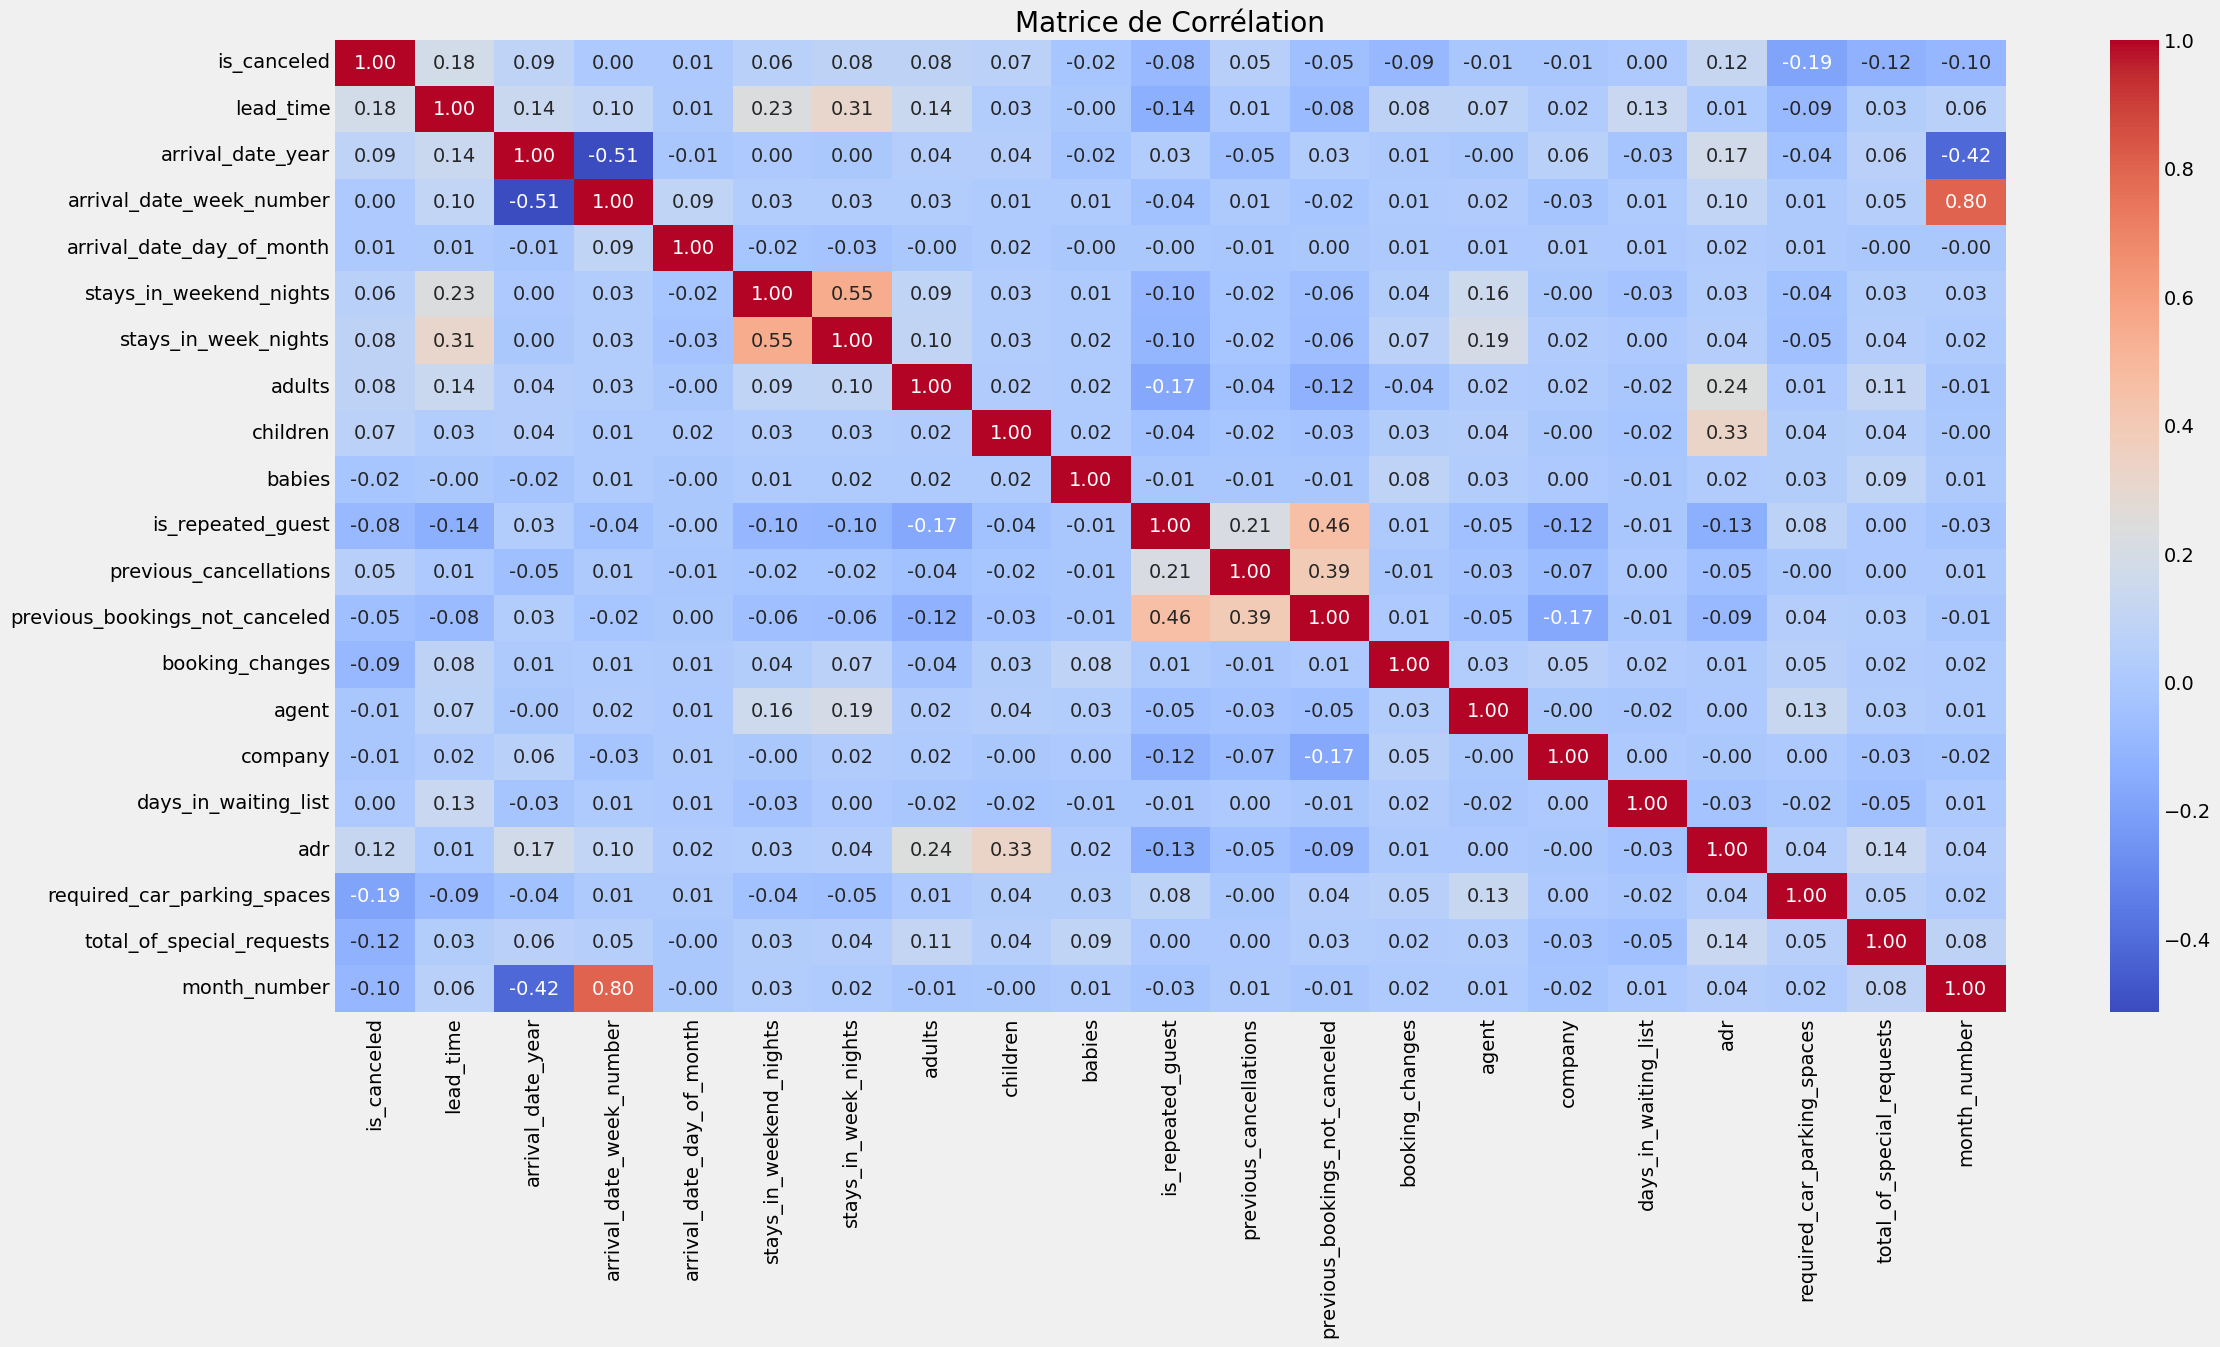

In [ ]:
# La matrice de corrélation permet de déterminer les relations linéaires entre les variables,

# Exclure les colonnes non numériques du calcul de corrélation
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Calculer la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

## 4.2. Analyse de la Corrélation entre ASP et les Variables Numériques

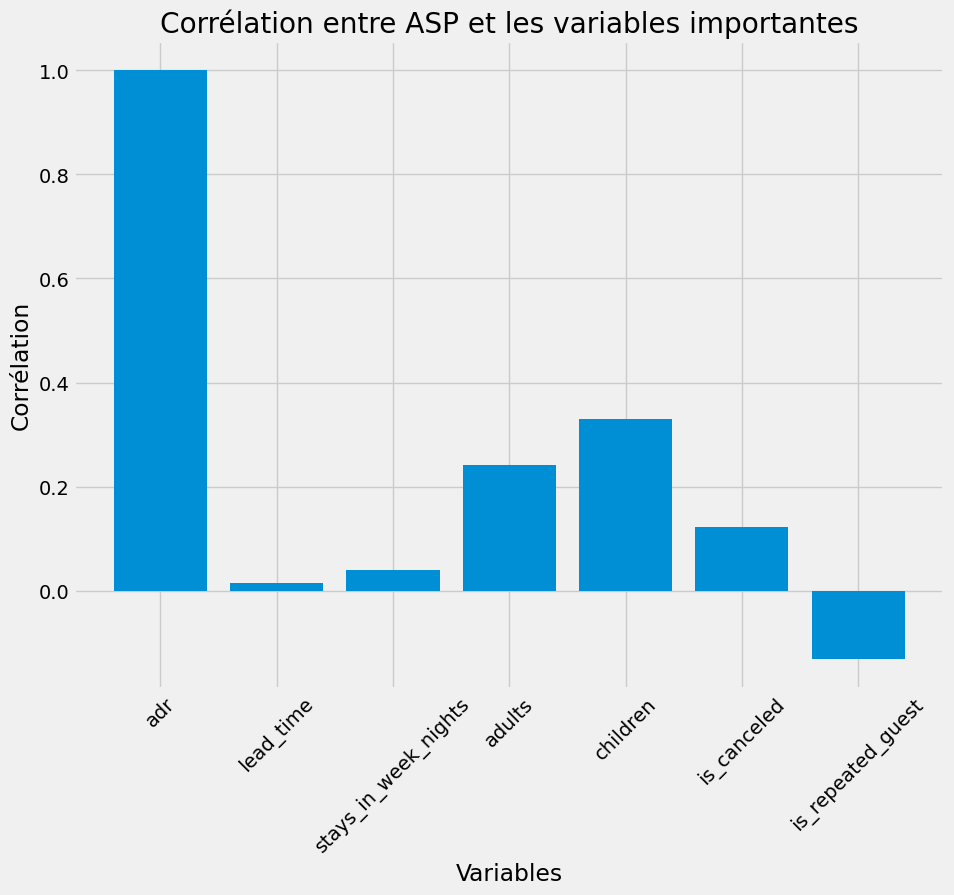

In [100]:
# Extraire la corrélation entre ASP et les variables importants
asp_correlation = correlation_matrix['adr']

important_columns = ['adr', 'lead_time', 'stays_in_week_nights', 'adults', 'children', 'is_canceled', 'is_repeated_guest']
filtered_important_correlation = asp_correlation[important_columns]

plt.figure(figsize=(10, 8))
plt.bar(filtered_important_correlation.index, filtered_important_correlation.values)
plt.title('Corrélation entre ASP et les variables importantes')
plt.xlabel('Variables')
plt.ylabel('Corrélation')

plt.xticks(rotation=45)

plt.show()

# 5. Analyse des relations de variables

## 5.1. Le nombre de nuits par type d'hôtel

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_7796\2879542065.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




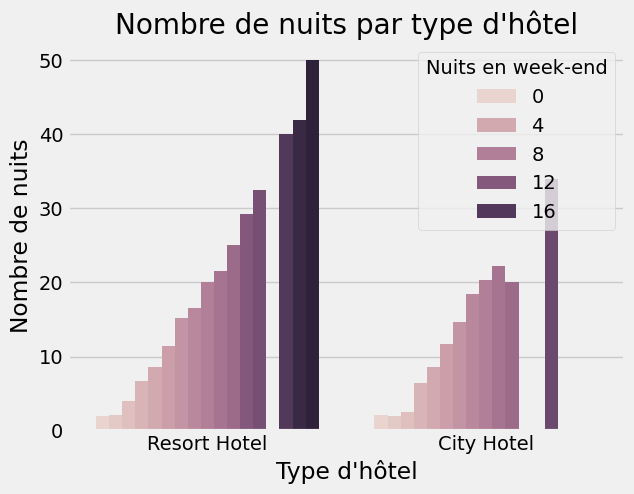

In [101]:
# Diagramme en barres empilées
sns.barplot(data=df, x='hotel', y='stays_in_week_nights', hue='stays_in_weekend_nights', ci=None)
plt.title('Nombre de nuits par type d\'hôtel')
plt.xlabel('Type d\'hôtel')
plt.ylabel('Nombre de nuits')
plt.legend(title='Nuits en week-end')
plt.show()

## 5.2. Analyse Comparative de l'ADR par Type de Chambre et Hôtel

In [102]:
# Les deux hôtels proposent différents types de chambres et différents arrangements de repas
# Les facteurs saisonniers sont également importants, ce qui entraîne des variations importantes des prix.
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

## 5.3. Analyse comparative entre le prix de nuit de chaque hotel

In [104]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [105]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['Month', 'price_for_resort_hotel', 'price_for_city_hotel']

# Fonction pour trier les mois
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

final__hotel_prices = sort_month(final_hotel, 'Month')
final__hotel_prices

Month  price_for_resort_hotel  price_for_city_hotel
0     January               49.419861             84.063949
1    February               54.151849             89.095640
2       March               57.822574             91.836402
3       April               77.484691            114.561728
4         May               78.919819            125.237006
5        June              110.344661            121.021817
6        July              152.842188            120.572661
7      August              184.029619            123.239221
8   September               99.279047            117.492830
9     October               63.760548            106.875107
10   November               49.842510             89.338057
11   December               66.035417             91.448972

In [106]:
plt.figure(figsize = (17, 8))

px.line(final__hotel_prices, x = 'Month', y = ['price_for_resort_hotel','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

## Conclusion : 
### Ce graphique montre clairement que les prix des Hotels Resort sont beaucoup plus élevés pendant l'été et que les prix des city Hotels varient moins et sont les plus chers au printemps et en automne.

## 5.3. Analyse comparative entre le nombre des clients de chaque hotel par mois

In [107]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']

city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']

final_guests_month = resort_guests.merge(city_guests,on='month')
final_guests_month.columns=['month','no of guests in resort hotel','no of guest in city hotel']
final_guests_month = sort_month(final_guests_month,'month')

final_guests_month

month  no of guests in resort hotel  no of guest in city hotel
0     January                          1659                       1945
1    February                          2033                       2592
2       March                          2164                       3449
3       April                          2151                       3316
4         May                          2212                       3644
5        June                          1903                       3467
6        July                          2975                       3818
7      August                          3120                       4452
8   September                          1867                       3152
9     October                          2170                       3031
10   November                          1713                       2151
11   December                          1665                       2004

In [108]:
px.line(final_guests_month, x = 'month', y = ['no of guests in resort hotel','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

## 5.4. Analyse comparative entre le prix de nuit par saison et type de chambre de chaque hotel

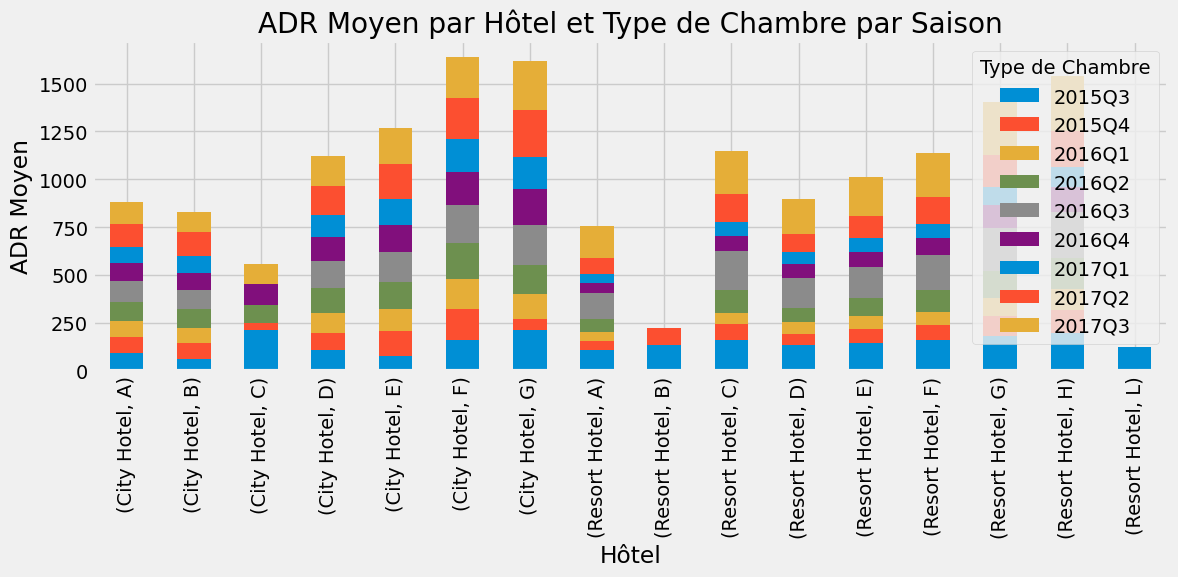

In [109]:
# Regroupement par hôtel, type de chambre et saison, puis calcul de l'ADR moyen
adr_mean_by_hotel_chamber_season = df.groupby(['hotel', 'reserved_room_type', 'season'])['adr'].mean()

adr_mean_by_hotel_chamber_season.unstack(level=-1).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('ADR Moyen par Hôtel et Type de Chambre par Saison')
plt.xlabel('Hôtel')
plt.ylabel('ADR Moyen')
plt.xticks(rotation=90) 
plt.legend(title='Type de Chambre')
plt.tight_layout()
plt.show()

## Remarque : ##
### les hôtels ont différents types de chambres et arrangements de repas, ainsi que des facteurs saisonniers importants qui influencent les prix. Cela signifie que l'ADR moyen peut varier significativement en fonction du type de chambre et de l'époque de l'année, ce qui pourrait expliquer pourquoi l'ADR moyen global pour un hôtel peut être plus faible que celui de l'autre.

## 5.5. Analyse de la Distribution des Nuits Passées par Type d'Hôtel

### 5.3.1. Supprimer les lignes où les Nuits Passée > 40


In [8]:
# addition des nmbre des nuit passer au weekend et au autre jour du semaine
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Supprimer les lignes où les Nuits Passée > 40
df = df.loc[df['total_nights'] <= 40]

In [9]:
stay = df.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

total_nights         hotel  Number of stays
0              0    City Hotel              331
1              0  Resort Hotel              384
2              1    City Hotel            13272
3              1  Resort Hotel             7748
4              2    City Hotel            21426
..           ...           ...              ...
61            33    City Hotel                2
62            33  Resort Hotel                1
63            34    City Hotel                1
64            35  Resort Hotel                5
65            38  Resort Hotel                1

[66 rows x 3 columns]

In [16]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

## 5.6. Nombre de nuits par type de client

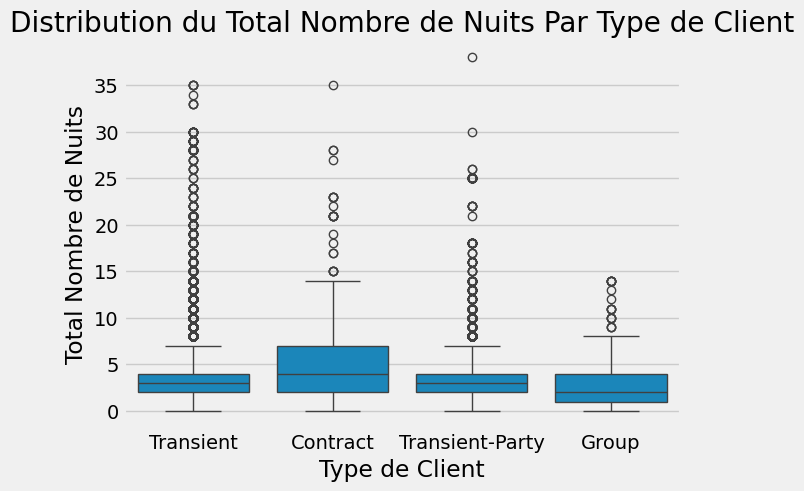

In [17]:
# Création du diagramme à barres avec des moustaches
sns.boxplot(x='customer_type', y='total_nights', data=df)

# Ajout d'un titre, d'étiquettes et d'une légende
plt.title('Distribution du Total Nombre de Nuits Par Type de Client')
plt.xlabel('Type de Client')
plt.ylabel('Total Nombre de Nuits')

plt.show()


# 6. Analyse croisée

## 6.1. Analyse croisée entre le type d'hôtel et le type de client

Analyse croisée entre le type d'hôtel et le type de client (nombre total de nuits en semaine):
customer_type  Contract  Group  Transient  Transient-Party
hotel                                                     
City Hotel         4836    519     133275            34010
Resort Hotel      10859    651      91110            22669


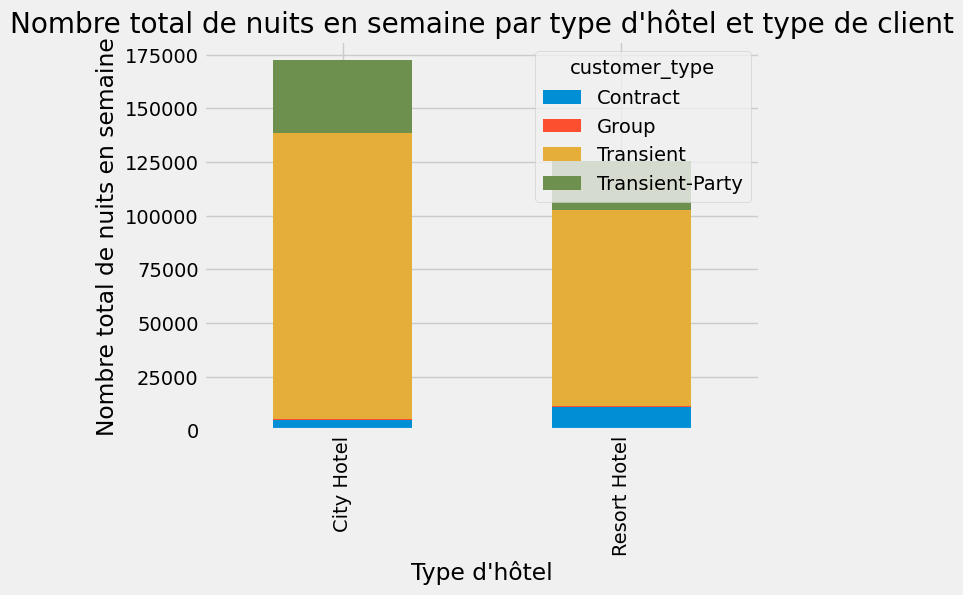

In [38]:
# Effectuer une analyse croisée entre le type d'hôtel et le type de client
cross_tab = pd.crosstab(index=df['hotel'], columns=df['customer_type'], values=df['stays_in_week_nights'], aggfunc='sum')

# Afficher la table croisée
print("Analyse croisée entre le type d'hôtel et le type de client (nombre total de nuits en semaine):")
print(cross_tab)

# Afficher le diagramme en barres empilées
cross_tab.plot(kind='bar', stacked=True)
plt.title('Nombre total de nuits en semaine par type d\'hôtel et type de client')
plt.xlabel('Type d\'hôtel')
plt.ylabel('Nombre total de nuits en semaine')
plt.show()

## 6.2. Analyse croisée entre le type d'hôtel et la region

In [22]:
# Effectuer une analyse croisée entre le type d'hôtel et le pays
cross_tab_RegHotel = pd.crosstab(index=df['region'], columns=df['hotel'])

# Afficher la table croisée
print("Analyse croisée entre le type d'hôtel et les regions :")
print(cross_tab_RegHotel)

Analyse croisée entre le type d'hôtel et le pays :
hotel          City Hotel  Resort Hotel
region                                 
Africa                932           174
Asia                 2540           356
Europe              70744         37167
North America        1756           509
Oceania               400           103
South America        2170           538


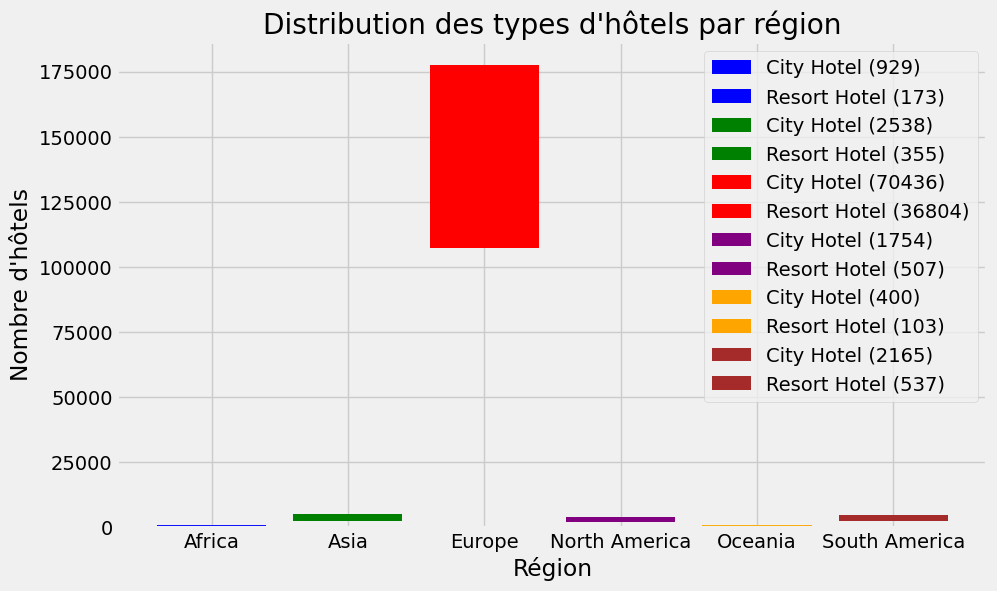

In [72]:
grouped = df.groupby(['region', 'hotel']).size().reset_index(name='counts')

# Créer un diagramme à barres empilées pour chaque région
fig, ax = plt.subplots(figsize=(10, 6))

# Définir les couleurs pour les barres
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Parcourir chaque région unique
for i, region in enumerate(grouped['region'].unique()):
    region_data = grouped[grouped['region'] == region]
    for hotel, count in region_data[['hotel', 'counts']].values:
        ax.bar(i, count, bottom=np.sum(region_data['counts'][:i]), color=colors[i % len(colors)], label=f'{hotel} ({count})')

# Configurer les axes et les titres
ax.set_title('Distribution des types d\'hôtels par région')
ax.set_xlabel('Région')
ax.set_ylabel('Nombre d\'hôtels')
ax.set_xticks(range(len(grouped['region'].unique())))
ax.set_xticklabels(grouped['region'].unique())  # Utiliser les noms des régions comme étiquettes sur l'axe des x
ax.legend()

plt.show()

## 6.3. Analyse croisée des Réservations par Hôtel et Region

In [23]:
# Calcul du nombre de réservations par hôtel et par pays
reservations_by_hotel_region = df.groupby(['hotel', 'region']).size().reset_index(name='reservation_count')

# Affichage du résultat
print(reservations_by_hotel_region)

           hotel         region  reservation_count
0     City Hotel         Africa                932
1     City Hotel           Asia               2540
2     City Hotel         Europe              70744
3     City Hotel  North America               1756
4     City Hotel        Oceania                400
5     City Hotel  South America               2170
6   Resort Hotel         Africa                174
7   Resort Hotel           Asia                356
8   Resort Hotel         Europe              37167
9   Resort Hotel  North America                509
10  Resort Hotel        Oceania                103
11  Resort Hotel  South America                538


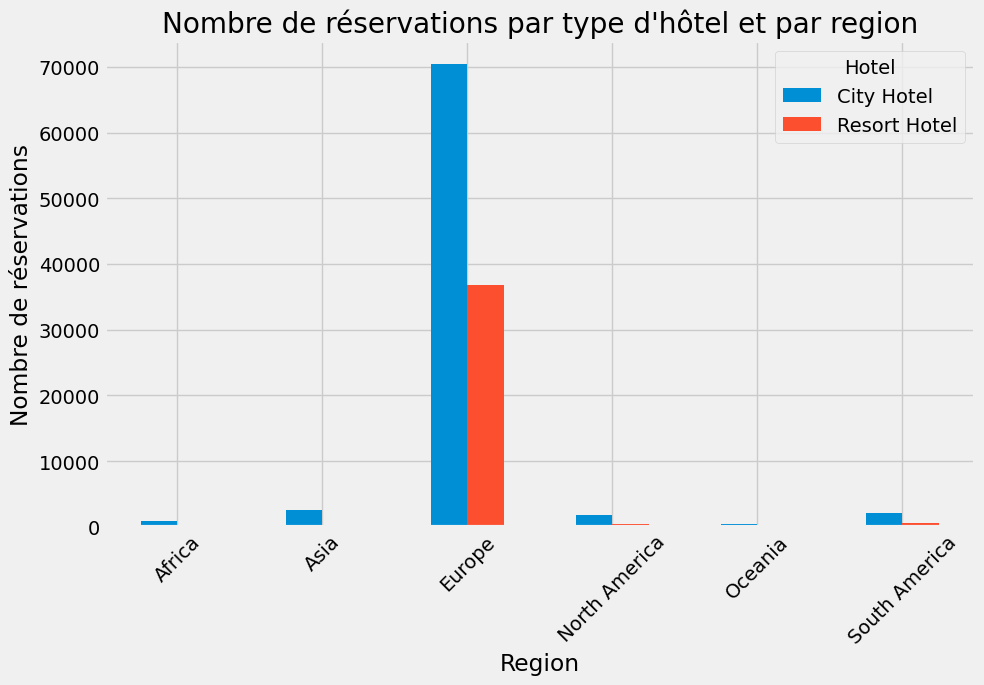

In [77]:
# Diagramme en barres groupées
cross_tab_RegHotel.plot(kind='bar', figsize=(10, 6))
plt.title('Nombre de réservations par type d\'hôtel et par region')
plt.xlabel('Region')
plt.ylabel('Nombre de réservations')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.show()

## 6.4. Analyse croisée de la distribution des Dates d'Arrivée et de Départ par Hôtel et Année

In [12]:
data_grouped = df.groupby(['arrival_date_year', 'hotel']).size().reset_index(name='counts')

px.line(data_frame=data_grouped, x='arrival_date_year', y='counts', color='hotel',
              title='Histogramme : Type d\'Hôtel en Fonction de l\'Année', template = 'plotly_dark')


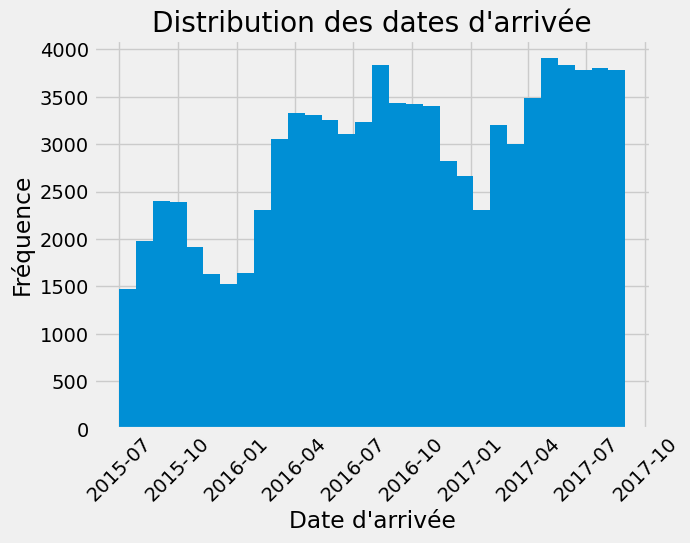

In [11]:
# Créer un histogramme pour la colonne date_arrive
df['date_arrive'].hist(bins=30)
plt.xlabel('Date d\'arrivée')
plt.ylabel('Fréquence')
plt.title('Distribution des dates d\'arrivée')
plt.xticks(rotation=45)

plt.show()

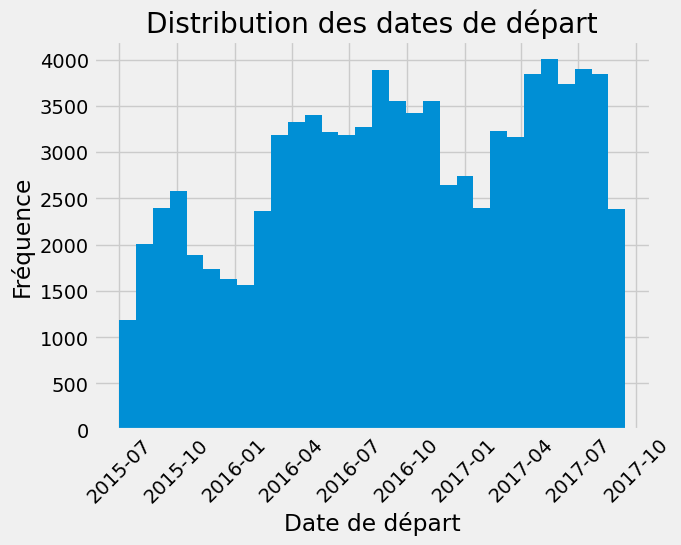

In [13]:
# Créer un histogramme pour la colonne departure_date
df['departure_date'].hist(bins=30)
plt.xlabel('Date de départ')
plt.ylabel('Fréquence')
plt.title('Distribution des dates de départ')
plt.xticks(rotation=45)

plt.show()

# 7. Data Preprocessing

## 7.1. Suppression des colonnes inutiles

In [50]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'assigned_room_type', 'booking_changes','reservation_status', 'country']

df.drop(useless_col, axis = 1, inplace = True)

## 7.2. Creation des Dataframes numerique et catégorielle

In [51]:
categ_cols = [col for col in df.columns if df[col].dtype == 'O']
categ_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [52]:
categ_df = df[categ_cols]
categ_df

hotel arrival_date_month meal market_segment  \
0       Resort Hotel               July   BB         Direct   
1       Resort Hotel               July   BB         Direct   
2       Resort Hotel               July   BB         Direct   
3       Resort Hotel               July   BB      Corporate   
4       Resort Hotel               July   BB      Online TA   
...              ...                ...  ...            ...   
119385    City Hotel             August   BB  Offline TA/TO   
119386    City Hotel             August   BB      Online TA   
119387    City Hotel             August   BB      Online TA   
119388    City Hotel             August   BB      Online TA   
119389    City Hotel             August   HB      Online TA   

       distribution_channel reserved_room_type deposit_type customer_type  \
0                    Direct                  C   No Deposit     Transient   
1                    Direct                  C   No Deposit     Transient   
2                    Direct                  A   No Deposit     Transient   
3                 Corporate                  A   No Deposit     Transient   
4                     TA/TO                  A   No Deposit     Transient   
...                     ...                ...          ...           ...   
119385                TA/TO                  A   No Deposit     Transient   
119386                TA/TO                  E   No Deposit     Transient   
119387                TA/TO                  D   No Deposit     Transient   
119388                TA/TO                  A   No Deposit     Transient   
119389                TA/TO                  A   No Deposit     Transient   

       reservation_status_date  
0                   2015-07-01  
1                   2015-07-01  
2                   2015-07-02  
3                   2015-07-02  
4                   2015-07-03  
...                        ...  
119385              2017-09-06  
119386              2017-09-07  
119387              2017-09-07  
119388              2017-09-07  
119389              2017-09-07  

[87230 rows x 9 columns]

In [53]:
categ_df['reservation_status_date'] = pd.to_datetime(categ_df['reservation_status_date'])

categ_df['year'] = categ_df['reservation_status_date'].dt.year
categ_df['month'] = categ_df['reservation_status_date'].dt.month
categ_df['day'] = categ_df['reservation_status_date'].dt.day

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_13136\1258261193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df['reservation_status_date'] = pd.to_datetime(categ_df['reservation_status_date'])
C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_13136\1258261193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df['year'] = categ_df['reservation_status_date'].dt.year
C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_13136\1258261193.py:4: SettingWithCopyWarning: 
A value is trying to be

In [54]:
categ_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

categ_df.head()

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_13136\2913661997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)


hotel meal market_segment distribution_channel reserved_room_type  \
0  Resort Hotel   BB         Direct               Direct                  C   
1  Resort Hotel   BB         Direct               Direct                  C   
2  Resort Hotel   BB         Direct               Direct                  A   
3  Resort Hotel   BB      Corporate            Corporate                  A   
4  Resort Hotel   BB      Online TA                TA/TO                  A   

  deposit_type customer_type  year  month  day  
0   No Deposit     Transient  2015      7    1  
1   No Deposit     Transient  2015      7    1  
2   No Deposit     Transient  2015      7    2  
3   No Deposit     Transient  2015      7    2  
4   No Deposit     Transient  2015      7    3

In [55]:
# printing unique values of each column
for col in categ_df.columns:
    print(f"{col}: \n{categ_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [56]:
# encoding categorical variables

categ_df['hotel'] = categ_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

categ_df['meal'] = categ_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

categ_df['market_segment'] = categ_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,'Complementary': 4, 'Groups': 5, 'Undefined': 6, 
                                                             'Aviation': 7})

categ_df['distribution_channel'] = categ_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,'GDS': 4})

categ_df['reserved_room_type'] = categ_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,'L': 7, 'B': 8})

categ_df['deposit_type'] = categ_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

categ_df['customer_type'] = categ_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

categ_df['year'] = categ_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

categ_df.head()

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_13136\1591363276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df['hotel'] = categ_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_13136\1591363276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df['meal'] = categ_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_13136\1591363276.py:7: SettingWithCopyWarning: 

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
0      0     0               0                     0                   0   
1      0     0               0                     0                   0   
2      0     0               0                     0                   1   
3      0     0               1                     1                   1   
4      0     0               2                     2                   1   

   deposit_type  customer_type  year  month  day  
0             0              0     0      7    1  
1             0              0     0      7    1  
2             0              0     0      7    2  
3             0              0     0      7    2  
4             0              0     0      7    3

In [57]:
numeric_df = df.drop(columns = categ_cols, axis = 1)
numeric_df.drop('is_canceled', axis = 1, inplace = True)
numeric_df

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0             342                        27                          1   
1             737                        27                          1   
2               7                        27                          1   
3              13                        27                          1   
4              14                        27                          1   
...           ...                       ...                        ...   
119385         23                        35                         30   
119386        102                        35                         31   
119387         34                        35                         31   
119388        109                        35                         31   
119389        205                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled  agent  company     adr  \
0                                    0   14.0    169.0    0.00   
1                                    0   14.0    169.0    0.00   
2                                    0   14.0    169.0   75.00   
3                                    0  304.0    169.0   75.00   
4                                    0  240.0    169.0   98.00   
...                                ...    ...      ...     ...   
119385                               0  394.0    169.0   96.14   
119386                               0    9.0    169.0  225.43   
119387                               0    9.0    169.0  157.71   
119388                               0   89.0    169.0  104.40   
119389                               0    9.0    169.0  151.20   

        required_car_parking_spaces  total_of_special_requests  
0                                 0                          0  
1                                 0                          0  
2                                 0                          0  
3                                 0                          0  
4                                 0                          1  
...                             ...                        ...  
119385                            0                          0  
119386                            0                          2  
119387                            0                          4  
119388                            0       

In [58]:
# Remplacer les valeurs négatives par zéro
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_df.fillna(0, inplace=True)


numeric_df['lead_time'] = np.log(numeric_df['lead_time'] + 1)
numeric_df['arrival_date_week_number'] = np.log(numeric_df['arrival_date_week_number'] + 1)
numeric_df['arrival_date_day_of_month'] = np.log(numeric_df['arrival_date_day_of_month'] + 1)
numeric_df['agent'] = np.log(numeric_df['agent'] + 1)
numeric_df['company'] = np.log(numeric_df['company'] + 1)
numeric_df['adr'] = np.log(numeric_df['adr'] + 1)

c:\Users\Mossab Weda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
numeric_df['adr'] = numeric_df['adr'].fillna(value = numeric_df['adr'].mean())
numeric_df.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0   5.837730                  3.332205                   0.693147   
1   6.603944                  3.332205                   0.693147   
2   2.079442                  3.332205                   0.693147   
3   2.639057                  3.332205                   0.693147   
4   2.708050                  3.332205                   0.693147   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

      agent   company       adr  required_car_parking_spaces  \
0  2.708050  5.135798  0.000000                            0   
1  2.708050  5.135798  0.000000                            0   
2  2.708050  5.135798  4.330733                            0   
3  5.720312  5.135798  4.330733                            0   
4  5.484797  5.135798  4.595120                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

In [60]:
X = pd.concat([categ_df, numeric_df], axis = 1)
y = df['is_canceled']

In [61]:
X.shape, y.shape

((87230, 26), (87230,))

## 7.3. Decomposer le data set en training set et test set

In [62]:
# 30% Test 70% Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [23]:
X_train

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
48450       1     0               2                     2                   2   
26496       0     0               2                     2                   1   
37995       0     0               3                     2                   1   
106915      1     0               3                     2                   1   
14925       0     0               2                     0                   1   
...       ...   ...             ...                   ...                 ...   
84757       1     3               2                     2                   1   
21004       0     0               3                     2                   2   
73051       1     3               2                     2                   1   
30672       0     2               3                     2                   1   
82119       1     0               1                     1                   1   

        deposit_type  customer_type  year  month  day  lead_time  \
48450              0              0     2      3   17   2.397895   
26496              0              0     2      8    2   0.000000   
37995              0              0     3      7    6   5.181784   
106915             0              1     3      3    5   2.833213   
14925              0              0     3      3   31   4.890349   
...              ...            ...   ...    ...  ...        ...   
84757              0              0     2      3    3   1.609438   
21004              0              0     2      2   15   3.496508   
73051              0              0     3      7   11   3.526361   
30672              0              0     2     11   30   3.135494   
82119              0              2     0     12   22   4.605170   

        arrival_date_week_number  arrival_date_day_of_month  \
48450                   2.639057                   3.178054   
26496                   3.496508                   0.693147   
37995                   3.332205                   1.098612   
106915                  2.302585                   1.098612   
14925                   2.890372                   3.367296   
...                          ...                        ...   
84757                   2.397895                   1.098612   
21004                   2.079442                   2.197225   
73051                   3.526361                   2.639057   
30672                   3.871201                   2.833213   
82119                   2.197225                   2.995732   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
48450                         0                     4       3       0.0   
26496                         1                     0       2       0.0   
37995                         2                     2       2       0.0   
106915                        0                     3       2       0.0   
14925                         1                     2       1       0.0   
...                         ...                   ...     ...       ...   
84757                         0                     1       2       0.0   
21004                         2                     5       2       0.0   
73051                         2                     0       2       0.0   
30672                         4                    10       1       0.0   
82119                         0                     1       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
48450        0                  0                       0   
26496        0                  0                       0   
37995        0                  0                       0   
106915       0                  0                       0   
14925        0                  1                       4   
...        ...                ...                     ...   
84757        0                  0                       0   
21004        0                  0                       0   
73051      

In [63]:
X_test

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
114227      1     0               2                     2                   1   
3883        0     0               2                     2                   4   
37531       0     2               2                     2                   3   
45697       1     0               2                     2                   1   
109642      1     3               2                     2                   1   
...       ...   ...             ...                   ...                 ...   
42187       1     0               2                     2                   1   
86603       1     0               2                     2                   1   
10758       0     0               2                     2                   1   
31854       0     0               2                     2                   1   
56012       1     0               2                     2                   2   

        deposit_type  customer_type  year  month  day  lead_time  \
114227             0              0     3      6   19   2.397895   
3883               0              0     2      1   11   3.295837   
37531              0              2     3      6   21   5.468060   
45697              0              0     0     11   22   4.382027   
109642             0              0     3      4   15   1.791759   
...              ...            ...   ...    ...  ...        ...   
42187              0              0     0      8   19   3.091042   
86603              0              0     2      4    6   4.304065   
10758              0              0     2     10   11   5.164786   
31854              0              2     3      1    8   3.044522   
56012              0              0     2      8   15   2.639057   

        arrival_date_week_number  arrival_date_day_of_month  \
114227                  3.258097                   2.944439   
3883                    1.945910                   1.609438   
37531                   3.178054                   2.397895   
45697                   3.871201                   2.944439   
109642                  2.772589                   2.639057   
...                          ...                        ...   
42187                   3.610918                   1.098612   
86603                   2.772589                   1.791759   
10758                   2.639057                   0.693147   
31854                   0.693147                   1.945910   
56012                   3.583519                   3.295837   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
114227                        1                     0       1       0.0   
3883                          1                     3       2       1.0   
37531                         4                     7       2       0.0   
45697                         0                     4       2       0.0   
109642                        0                     2       2       0.0   
...                         ...                   ...     ...       ...   
42187                         0                     2       2       0.0   
86603                         0                     1       2       0.0   
10758                         2                     5       2       0.0   
31854                         0                     2       3       0.0   
56012                         2                     3       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
114227       0                  0                       0   
3883         0                  0                       0   
37531        0                  0                       0   
45697        0                  0                       0   
109642       0                  0                       0   
...        ...                ...                     ...   
42187        0                  0                       0   
86603        0                  0                       0   
10758      

In [25]:
y_train

48450     1
26496     0
37995     0
106915    0
14925     1
         ..
84757     0
21004     0
73051     1
30672     0
82119     1
Name: is_canceled, Length: 61061, dtype: int64

In [26]:
y_test

39353     0
106569    0
29967     0
105512    0
43045     0
         ..
104142    0
106228    0
55332     1
25445     0
27306     0
Name: is_canceled, Length: 26169, dtype: int64

# 8. Modeling

In [65]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8586113340211701
Confusion Matrix : 
[[18417   600]
 [ 3100  4052]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     19017
           1       0.87      0.57      0.69      7152

    accuracy                           0.86     26169
   macro avg       0.86      0.77      0.80     26169
weighted avg       0.86      0.86      0.85     26169



In [66]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7981963391799457
Confusion Matrix : 
[[18034   983]
 [ 4298  2854]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     19017
           1       0.74      0.40      0.52      7152

    accuracy                           0.80     26169
   macro avg       0.78      0.67      0.70     26169
weighted avg       0.79      0.80      0.78     26169



c:\Users\Mossab Weda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9317130956475219
Confusion Matrix : 
[[18135   882]
 [  905  6247]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19017
           1       0.88      0.87      0.87      7152

    accuracy                           0.93     26169
   macro avg       0.91      0.91      0.91     26169
weighted avg       0.93      0.93      0.93     26169



In [68]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9305667010585044
Confusion Matrix : 
[[18818   199]
 [ 1618  5534]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     19017
           1       0.97      0.77      0.86      7152

    accuracy                           0.93     26169
   macro avg       0.94      0.88      0.91     26169
weighted avg       0.93      0.93      0.93     26169



In [69]:
X = pd.concat([categ_df, numeric_df], axis = 1)
y = to_categorical(df['is_canceled'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


In [33]:
model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (26, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 100)

c:\Users\Mossab Weda\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7688 - loss: 0.5146 - val_accuracy: 0.8898 - val_loss: 0.3013
Epoch 2/100
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9045 - loss: 0.2691 - val_accuracy: 0.9365 - val_loss: 0.1766
Epoch 3/100
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9422 - loss: 0.1714 - val_accuracy: 0.9585 - val_loss: 0.1309
Epoch 4/100
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9588 - loss: 0.1291 - val_accuracy: 0.9522 - val_loss: 0.1429
Epoch 5/100
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9657 - loss: 0.1087 - val_accuracy: 0.9692 - val_loss: 0.1102
Epoch 6/100
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9689 - loss: 0.0982 - val_accuracy: 0.9744 - val_loss: 0.0790
Epoch 7/100
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9724 - loss: 0.0882 - val_accuracy: 0.9699 - val_loss: 0.1103
Epoch 8/100
1909/1909 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9766 - loss: 0

In [35]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

818/818 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9931 - loss: 0.0353
Accuracy of model is 0.9927777051925659
